<a href="https://colab.research.google.com/github/SatvikVarshney/Group1_Final_Project/blob/main/TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def convert_petrov_classification_data(y):
    y_converted = []
    for idx, y_val in enumerate(y):
        if y_val == "O": y_converted.append(0)
        elif y_val == "I": y_converted.append(1)
        elif y_val == "II": y_converted.append(2)
        elif y_val == "III": y_converted.append(3)
        elif y_val == "D": y_converted.append(4)
        elif y_val == "N": y_converted.append(5)
    return y_converted

In [ ]:
df = pd.read_csv("petrov_data.csv", sep=',', header=None)
df1=df[:10000]
df = df1
data = df.to_numpy() # convert dataframe to array
#data = data[1:,1:7]
# separate the last colums as y-data
Y = data[:,5] 
X = np.delete(data, 5,1)  # Input data
y = np.array(convert_petrov_classification_data(Y))

In [ ]:
print(Y)
print(y)


['I' 'O' 'O' ... 'III' 'O' 'I']
[1 0 0 ... 3 0 1]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 0.834s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.717377
[t-SNE] KL divergence after 1000 iterations: 1.001462


[Text(0.5, 1.0, 'TSNE projection of Petrov Types')]

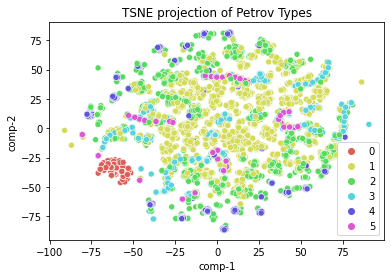

In [ ]:
x = X

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title="TSNE projection of Petrov Types")
